### Crea la bolsa de fichas

In [ ]:
from ApylabradosModule import Pawns

bag_of_pawns = Pawns()
bag_of_pawns.createBag()

### Crea las fichas del jugador 

In [ ]:
player_pawns = Pawns()

### Crea el tablero

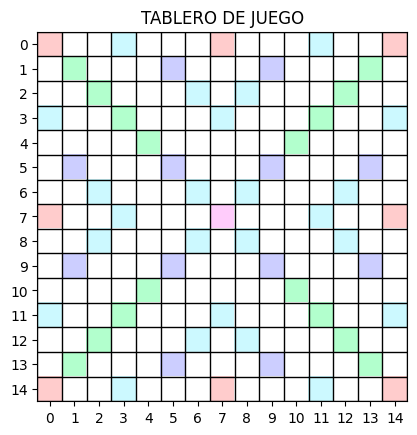

In [1]:
from ApylabradosModule import Board

#Crea el tablero del juego
board = Board()
board.showBoard()

### Inicializar la variable score de la clase Board a 0

In [ ]:
print(f"\nPuntuación: {board.score}\n")

### Da la bienvenida

In [ ]:
board.welcome()

### Instrucciones del juego

In [ ]:
board.instructions()

### Reparte 7 fichas al jugador y muéstraselas

In [ ]:
def deal_pawns():
    """
    Agarra fichas de la bolsa hasta tener las 7
    """
    #calcula las fichas que te faltan
    missing_pawns = 7 - len(player_pawns.letters)
    #Agarra fichas aleatorias de la bolsa
    for pawn in range(missing_pawns):
        player_pawn = bag_of_pawns.takeRandomPawn().upper()
        player_pawns.addPawn(player_pawn)



# Genera y guarda tus fichas
deal_pawns()

print("\nTus Fichas: ")
show_player_pawns = player_pawns.showPawns() 

### Ofrece ayuda con las palabras que puede formar o permite al usuario introducir palabra

In [ ]:
from ApylabradosModule import Word, Dictionary, FrecuencyTable



def insert_word():
    """
    Inserta y devuelve una palabra valida
    """
    while True:
        msg = "Selecciona una opcion:\n1 para introducir una palabra\n2 para ver sugerencias\n3 Descartar tus fichas y robar nuevas\n4 para salir"
        select = input(msg)
        
        if select == "1":
            my_word = Word.readWord()
            if Dictionary.validateWord(my_word):
                print("\n¡Palabra válida ingresada!\n")
                return my_word
            else:
                print("\nERROR: La palabra ingresada no es válida o no existe\n")
                
        elif select == "2":
            print("\nBuscando palabras el proceso puede tardar unos segundos...")
            print("-" * 40)
            combinations = Dictionary.showWord(player_pawns)
            if combinations == False:
                # Si no hay combinaciones posible roba nuevas fichas
                for letter in player_pawns.letters:
                    bag_of_pawns.addPawn(letter)
                    player_pawns.letters.remove(letter)
                print("\nTus fichas nuevas:")
                deal_pawns()
                
        elif select == "3":
            # En caso de tus combinaciones de fichas no tenga una letra que coincida
            # con las fichas en el tablero, puedes soliciatar nuevas fichas
            for letter in player_pawns.letters:
                bag_of_pawns.addPawn(letter)
                player_pawns.letters.remove(letter)
            print("\nTus fichas nuevas:")
            deal_pawns()  
             
        elif select == "4":
            break
                
        else:
            print("\nERROR: Por favor, elige una opción válida\n")



# Inserta y guarda una palabra valida
my_word = insert_word()

### Introduce la ubicacion de la palabra o solicita ayuda para colocarla

In [ ]:

def wordLocation(board, player_pawns, my_word):
    """
    Introduce las coordenadas en el tablero
    """
    while True:
        select = input("Selecciona:\n1 - Para introducir las coordenadas de la palabra\n2 - Solicita ayuda\n3 - Para salir")
        
        if select == "1":
            # Ubicacion de la palabra (eje X, eje Y, direccion de la palabra)
            while True:
                x_coordenates = int(input("Coordenada del eje vertical para colocar la primera letra:"))
                if x_coordenates > 14:
                    print('\nERROR: introduce una cordenada entre el 0 o el 14')
                else:
                    break

            while True:
                y_coordenates = int(input("Coordenadas del eje horizontal para colocar la primera letra: "))
                if y_coordenates > 14:
                    print('\nERROR: introduce una cordenada entre el 0 o el 14')
                else:
                    break

            while True:
                my_direction = input("Direccion de la palabra 'V' (vertical) o 'H' (Horizontal):").upper()
                if my_direction not in 'VH':
                    print('\nERROR: introduce V para vertical o H para horizontal')
                else:
                    break
            print("\n¡Opcion válida ingresada!\n")    
            return x_coordenates, y_coordenates, my_direction  
                
        elif select == "2":
            # MUESTRA LAS DIRECCIONES POSIBLES PARA COLOCAR LA PALABRA EN EL TABLERO
            # SI LA PALABRA NO SE PUDE COLOCAR SOLICITA UNA NUEVA
            if not board.showWordPlacement(player_pawns, my_word.word[0]):
                my_word = insert_word()

        elif select == "3":
            break
        
        else:
            print("\nERROR: Opcion invalida, por favor seleccione una opcion valida.")



# inserta coordenadas
x_coordenates, y_coordenates, my_direction = wordLocation(board, player_pawns, my_word)



### Comprueba que se cumplen las normas para ubicar la palabra en el tablero

In [ ]:

def validation_coordenates(x_coordenates, y_coordenates, my_direction):
    ###############################################################################
    # Valida que el jugador tiene las fichas necesarias para formar la palabra.
    # Y que se cumple las reglas para colocar las coordenadas introducidas
    # por el jugador.
    ###############################################################################
    missing_pawns = board.getPawns(
                                word=my_word.word[0],
                                cord_x= x_coordenates,
                                cord_y=y_coordenates,
                                direction=my_direction
                                )

    
    if not FrecuencyTable.isSubset(missing_pawns.word, player_pawns.letters):
        t_missing_pawn = '\nERROR: Te faltan fichas para completar tu palabra en el tablero'
        print(t_missing_pawn)
        return False


    ###############################################################################
    # Verifica que se cumple las reglas del juego
    ###############################################################################
    check_rules = board.isPossible(word = Pawns.getTotalPawns(my_word), 
                                    cord_x = x_coordenates, 
                                    cord_y = y_coordenates, 
                                    direction = my_direction)

    # Si cumple con las reglas dibuja la palabra en el tablero
    if check_rules[0] == True:
        #Colaca la palabra en el tablero
        board.placeWord(player_pawns = player_pawns,
                    place_word = Pawns.getTotalPawns(my_word),
                    cord_x = x_coordenates, 
                    cord_y = y_coordenates, 
                    direction = my_direction)
        return True

    #Si no cumple no muestra la palabra en el juego    
    else:
        print(check_rules[1])
        return False



if validation_coordenates(x_coordenates, y_coordenates, my_direction):
    # Elimina las letras de la palabra introducida en el tablero de tu mano
    for letter in my_word.word[0]:
        player_pawns.letters.remove(letter)
    print(f"\nPUNTOS: {board.score}\n")
    board.showBoard()
else:
    x_coordenates, y_coordenates, my_direction = wordLocation(board, player_pawns, my_word)

### Otra ronda mas

In [ ]:
def options(status):
    """
    Menu con opciones para el juego
    """
    if status == 0:
        print('\nSELECCIONA UNA OPCION:')
        print('1. Seguir jugando')
        print('2. Consultar tus fichas')
        print('3. Consultar tus puntos')
        print('4. Consultar los puntos de cada ficha')
        print('5. Consulta cuantas fichas quedan en la bolsa')
        print('6. Mostrar opciones del menu')
        print('7. Salir del juego')
    else:
        selection = input('Selecciona una opcion del menu')
        return selection

# Interruptor evita mostrar continuamente el menu en el programa
status = 0

while True:
    # Coge las fichas que te falten de la bolsa
    deal_pawns()
    
    if len(bag_of_pawns.letters) < 2:
        print("\nNo quedan mas fichas el juego a terminado\n")
        break

    elif len(bag_of_pawns.letters) > 2:
        game_menu = options(status)
        status = 1
        
        if game_menu == "1":
            print('\nContinuemos con el juego...¿seras capaz de sacar mas puntos?')
            # Inserta y guarda una palabra valida
            my_word = insert_word()
            # inserta coordenadas
            x_coordenates, y_coordenates, my_direction = wordLocation(board, player_pawns, my_word)
            # Valida entradas
            if validation_coordenates(x_coordenates, y_coordenates, my_direction):
                # Elimina las letras de la palabra introducida en el tablero de tu mano
                for letter in my_word.word[0]:
                    player_pawns.letters.remove(letter)
                print(f"\nPUNTOS: {board.score}\n")
                board.showBoard()
            else:
                x_coordenates, y_coordenates, my_direction = wordLocation(board, player_pawns, my_word)
        
        elif game_menu == "2":
            print('\nFichas en tu mano: ')
            show_player_pawns = player_pawns.showPawns()
        
        elif game_menu == "3":
            print(f"\nPuntos ganados: {board.score}\n")
        
        elif game_menu == "4":
            print('\nValor en puntos de cada letra: ')
            for key, value in player_pawns.points.items():
                print(f'{key} -> {value} puntos.')
        
        elif game_menu == "5":
            print(f"\nQuedan {len(bag_of_pawns.letters)} fichas en el juego")
        
        elif game_menu == "6":
            status = 0
            
        elif game_menu == "7":
            print("\n¡¡Hasta la vista, baby!!")
            break
               
        else:
            print("\nPor favor selecciona una opcion valida (1, 2, 3, 4 o 5)\n")
        
        
print(f"\nPuntos ganados en la partida: {board.score}\n")
print("Así ha quedado tu tablero finalmente: ")
board.showBoard()      